The purpose of this code is to analyze if there are very basic betting paterns that may be profitable. Specifically, the hypothesis to test is if betting on the odds favorite for every game is advantagous or if betting on the underdawg is better. Additionally, we will study the over and under of the point spread.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the main dataset
df = pd.read_csv('/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv')

# Display the first 5 records
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [2]:
# Filter rows where team_favorite_id is not null
df_filtered = df[df['team_favorite_id'].notnull()]

# Display the first 5 records
df_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN


In [3]:
# Determine the actual winning team
df_filtered.loc[:, 'winning_team'] = df_filtered.apply(
    lambda row: row['team_home'] if row['score_home'] > row['score_away'] 
                else row['team_away'],
    axis=1
)

# Check if the favorite won
df_filtered.loc[:, 'favorite_won'] = df_filtered['team_favorite_id'] == df_filtered['winning_team']

df_filtered.head()

/tmp/ipykernel_13/1131641666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'winning_team'] = df_filtered.apply(
/tmp/ipykernel_13/1131641666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'favorite_won'] = df_filtered['team_favorite_id'] == df_filtered['winning_team']


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,winning_team,favorite_won
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,Green Bay Packers,False
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,Green Bay Packers,False
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,New York Jets,False
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,Kansas City Chiefs,False
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,Baltimore Colts,False


In [4]:
# create a dictionary to define the acronym for team_favorite_id

# Drop missing team_favorite_id values and get unique combinations
distinct_combos = df[df['team_favorite_id'].notnull()][['team_favorite_id', 'team_home']].drop_duplicates()

# Sort for readability
distinct_combos = distinct_combos.sort_values(by=['team_favorite_id', 'team_home'])

# Display the result
print(distinct_combos)

distinct_combos.to_csv('team_favorite_mappings.csv', index=False)


team_map = {
    'WAS': ['Washington Redskins', 'Washington Football Team', 'Washington Commanders'],
    'LVR': ['Las Vegas Raiders', 'Oakland Raiders','Los Angelas Raiders'],
    'LA': ['Los Angeles Rams', 'St. Louis Rams'],
    'LAR': ['Los Angeles Rams'],
    'LV': ['Las Vegas Raiders'],
    'LAC': ['San Diego Chargers', 'Los Angeles Chargers'],
    'BAL': ['Baltimore Ravens'],
    'GB': ['Green Bay Packers'],
    'ARI': ['Arizona Cardinals'],
    'ATL':['Atlanta Falcons'],
    'CAR':['Carolina Panthers'],
    'CHI':['Chicago Bears'],
    'CIN':['Cincinnati Bengals'],
    'CLE':['Cleveland Browns'],
    'DAL':['Dallas Cowboys'],
    'DEN':['Denver Broncos'],
    'DET':['Detroit Lions'],
    'HOU':['Houston Oilers'],
    'IND':['Baltimore Colts','Indianapolis Colts'],
    'JAX':['Jacksonville Jaguars'],
    'KC':['Kansas City Chiefs'],
    'MIA':['Miami Dolphins'],
    'MIN':['Minnesota Vikings'],
    'NE':['New England Patriots'],
    'NJY':['New York Jets'], # could be an error, but NJY appears
    'NO':['New Orleans Saints'],
    'NYG':['New York Giants'],
    'NYJ':['New York Jets'],
    'PHI':['Philadelphia Eagles'],
    'PIT':['Pittsburgh Steelers'],
    'SEA':['Seattle Seahawks'],
    'SF':['San Francisco 49ers'],
    'TB':['Tampa Bay Buccaneers'],
    'TEN':['Tennessee Oilers','Tennessee Titans'],
    'BUF':['Buffalo Bills']
}

      team_favorite_id                 team_home
5870               ARI         Arizona Cardinals
4373               ARI           Atlanta Falcons
3121               ARI           Baltimore Colts
11643              ARI             Buffalo Bills
12727              ARI         Carolina Panthers
...                ...                       ...
6550               WAS      Tampa Bay Buccaneers
6698               WAS          Tennessee Oilers
13246              WAS     Washington Commanders
12781              WAS  Washington Football Team
2542               WAS       Washington Redskins

[1117 rows x 2 columns]


In [5]:
# Map acronym to full name(s)
df_filtered['favorite_team_full_list'] = df_filtered['team_favorite_id'].map(team_map)

# Check if winning team is in list of possible names
df_filtered['favorite_won'] = df_filtered.apply(
    lambda row: row['winning_team'] in row['favorite_team_full_list']
                if isinstance(row['favorite_team_full_list'], list)
                else False,
    axis=1
)

unmatched_ids = df_filtered[~df_filtered['team_favorite_id'].isin(team_map.keys())]['team_favorite_id'].unique()

df_filtered = df_filtered[df_filtered['team_favorite_id'] != 'PICK']

print("Unmatched team_favorite_id values:")
print(unmatched_ids)

/tmp/ipykernel_13/3817315489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['favorite_team_full_list'] = df_filtered['team_favorite_id'].map(team_map)


Unmatched team_favorite_id values:
['PICK']


/tmp/ipykernel_13/3817315489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['favorite_won'] = df_filtered.apply(


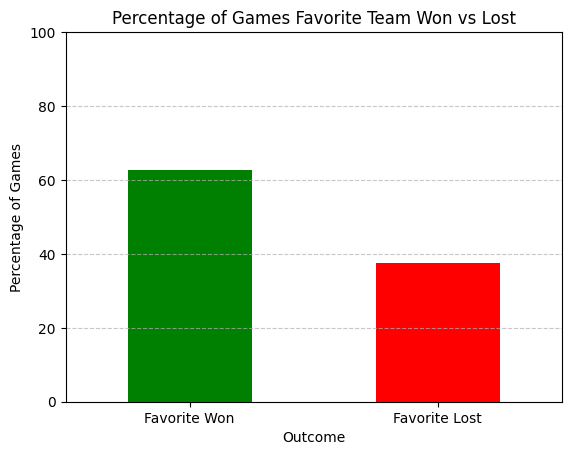

In [6]:
# Safe mapping with fallback
df_filtered['favorite_team_full_list'] = df_filtered['team_favorite_id'].apply(
    lambda x: team_map.get(x, [])
)

# Check if the winner is in the list of possible names
df_filtered['favorite_won'] = df_filtered.apply(
    lambda row: row['winning_team'] in row['favorite_team_full_list'],
    axis=1
)

# Plot percentages
favorite_win_percentage = df_filtered['favorite_won'].value_counts(normalize=True) * 100
favorite_win_percentage = favorite_win_percentage.rename({True: 'Favorite Won', False: 'Favorite Lost'})

favorite_win_percentage.plot(kind='bar', color=['green', 'red'])
plt.title('Percentage of Games Favorite Team Won vs Lost')
plt.ylabel('Percentage of Games')
plt.xlabel('Outcome')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
def calc_margin(row):
    if row['favorite_team_full_list'] and row['team_home'] in row['favorite_team_full_list']:
        return row['score_home'] - row['score_away']
    elif row['favorite_team_full_list'] and row['team_away'] in row['favorite_team_full_list']:
        return row['score_away'] - row['score_home']
    else:
        return None  # No favorite identified

# Calculate how many points the favorite won or lost by
df_filtered['favorite_margin'] = df_filtered.apply(calc_margin, axis=1)

# Determine if the favorite covered the spread
df_filtered['favorite_covered'] = df_filtered.apply(
    lambda row: (
        row['favorite_margin'] is not None and
        row['spread_favorite'] is not None and
        row['favorite_margin'] > abs(row['spread_favorite'])  # Use absolute value to compare
    ),
    axis=1
)

df_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,winning_team,favorite_won,favorite_team_full_list,favorite_margin,favorite_covered
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,...,True,54.0,7.0,90.0,NaN,Green Bay Packers,True,[Green Bay Packers],25.0,True
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,...,True,60.0,12.0,74.0,NaN,Green Bay Packers,True,[Green Bay Packers],19.0,True
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,...,True,66.0,12.0,80.0,rain,New York Jets,False,"[Baltimore Colts, Indianapolis Colts]",-9.0,False
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,...,True,55.0,14.0,84.0,rain,Kansas City Chiefs,False,[Minnesota Vikings],-16.0,False
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,...,True,59.0,11.0,60.0,NaN,Baltimore Colts,True,"[Baltimore Colts, Indianapolis Colts]",3.0,True


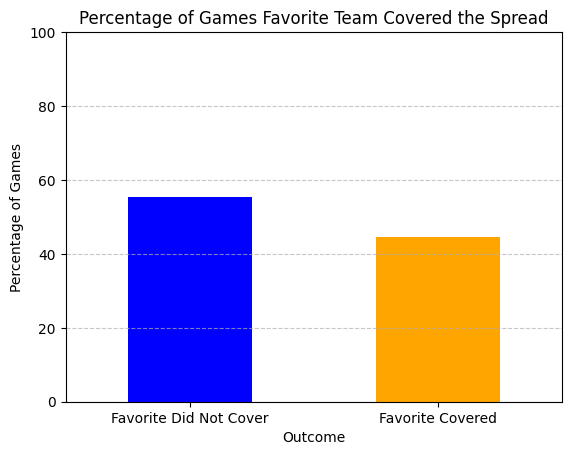

In [8]:
# Compute percentage (normalize=True gives proportion)
cover_percentage = df_filtered['favorite_covered'].value_counts(normalize=True) * 100

# Rename for clarity
cover_percentage = cover_percentage.rename({True: 'Favorite Covered', False: 'Favorite Did Not Cover'})

# Plot
cover_percentage.plot(kind='bar', color=['blue', 'orange'])
plt.title('Percentage of Games Favorite Team Covered the Spread')
plt.ylabel('Percentage of Games')
plt.xlabel('Outcome')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# Count how many games were bet on (i.e., all with a favorite)
num_games = df_filtered['favorite_covered'].notnull().sum()

# Count how many favorites actually covered
num_wins = df_filtered['favorite_covered'].sum()

# Number of losses
num_losses = num_games - num_wins

# Payout for each win at -110 odds
win_payout = 10 * (100 / 110)  # ≈ $9.09 profit per win

# Total return
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

print(f"Total Games Bet: {num_games}")
print(f"Favorites Covered: {num_wins}")
print(f"Favorites Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

Total Games Bet: 11464
Favorites Covered: 5115
Favorites Did Not Cover: 6349
Total Winnings: $46500.00
Total Losses: -$63490.00
Net Profit: $-16990.00
Return on Investment (ROI): -14.82%


In [10]:
df_2024 = df_filtered[df_filtered['schedule_season'] == 2024].copy()

df_2024.to_csv('/kaggle/working/df_2024.csv', index=False)

# Count games with valid favorite_covered values
num_games = df_2024['favorite_covered'].notnull().sum()
num_wins = df_2024['favorite_covered'].sum()
num_losses = num_games - num_wins

# Calculate payouts
win_payout = 10 * (100 / 110)  # $9.09 profit per win
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

# Display results
print(f"--- 2024 Season Betting Summary ---")
print(f"Total Games Bet: {num_games}")
print(f"Favorites Covered: {num_wins}")
print(f"Favorites Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

--- 2024 Season Betting Summary ---
Total Games Bet: 285
Favorites Covered: 146
Favorites Did Not Cover: 139
Total Winnings: $1327.27
Total Losses: -$1390.00
Net Profit: $-62.73
Return on Investment (ROI): -2.20%


In [11]:
# Count how many games were bet on (i.e., where spread was set)
num_games = df_filtered['favorite_covered'].notnull().sum()

# Count how many underdogs covered (i.e., favorite did NOT cover)
num_wins = (~df_filtered['favorite_covered']).sum()

# Number of losses
num_losses = num_games - num_wins

# Payout for each win at -110 odds
win_payout = 10 * (100 / 110)  # ≈ $9.09 profit per win

# Total return
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

# Display results
print(f"--- Underdog Betting Summary ---")
print(f"Total Games Bet: {num_games}")
print(f"Underdogs Covered: {num_wins}")
print(f"Underdogs Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

--- Underdog Betting Summary ---
Total Games Bet: 11464
Underdogs Covered: 6349
Underdogs Did Not Cover: 5115
Total Winnings: $57718.18
Total Losses: -$51150.00
Net Profit: $6568.18
Return on Investment (ROI): 5.73%


In [12]:
# Filter for 2024 season
df_2024 = df_filtered[df_filtered['schedule_season'] == 2024].copy()

# Optional: Save to CSV
df_2024.to_csv('/kaggle/working/df_2024.csv', index=False)

# Count games with valid spread outcomes
num_games = df_2024['favorite_covered'].notnull().sum()

# Count how many times the UNDERDOG covered (i.e., favorite did NOT cover)
num_wins = (~df_2024['favorite_covered']).sum()

# Number of losses
num_losses = num_games - num_wins

# Calculate payouts
win_payout = 10 * (100 / 110)  # $9.09 profit per win
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

# Display results
print(f"--- 2024 Season Underdog Betting Summary ---")
print(f"Total Games Bet: {num_games}")
print(f"Underdogs Covered: {num_wins}")
print(f"Underdogs Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")


--- 2024 Season Underdog Betting Summary ---
Total Games Bet: 285
Underdogs Covered: 139
Underdogs Did Not Cover: 146
Total Winnings: $1263.64
Total Losses: -$1460.00
Net Profit: $-196.36
Return on Investment (ROI): -6.89%
